In [20]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("../data/Bakery sales.csv")

# Borrar todas las filas donde la columna 'article' no tenga más de 2 caracteres
df = df[df['article'].str.len() > 2]

# Mostrar las primeras filas del DataFrame resultante
print(df.head())

   Unnamed: 0        date   time  ticket_number               article  \
0           0  2021-01-02  08:38       150040.0              BAGUETTE   
1           1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2           4  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3           5  2021-01-02  09:14       150041.0                  PAIN   
4           8  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   

   Quantity unit_price  
0       1.0     0,90 €  
1       3.0     1,20 €  
2       2.0     1,20 €  
3       1.0     1,15 €  
4       5.0     1,20 €  


In [21]:
# Calcular la demanda valorizada = Quantity * unit_price
"""
   Quantity unit_price  
0       1.0     0,90 €  
1       3.0     1,20 €  
2       2.0     1,20 €  
3       1.0     1,15 €  
4       5.0     1,20 €  

"""
df_abc = df.copy()

df_abc["DemandaValorizada"] = df["Quantity"] * df["unit_price"].str.replace(" €", "").str.replace(",", ".").astype(float)

# ordenar el DataFrame por la nueva columna, de forma descendente
ddf_abcf = df_abc.sort_values(by="DemandaValorizada", ascending=False)

# Mostrar las primeras filas del DataFrame con la nueva columna
print(df_abc.head())

print(df_abc.info())

   Unnamed: 0        date   time  ticket_number               article  \
0           0  2021-01-02  08:38       150040.0              BAGUETTE   
1           1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2           4  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3           5  2021-01-02  09:14       150041.0                  PAIN   
4           8  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   

   Quantity unit_price  DemandaValorizada  
0       1.0     0,90 €               0.90  
1       3.0     1,20 €               3.60  
2       2.0     1,20 €               2.40  
3       1.0     1,15 €               1.15  
4       5.0     1,20 €               6.00  
<class 'pandas.core.frame.DataFrame'>
Index: 234000 entries, 0 to 234004
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         234000 non-null  int64  
 1   date               234000 non-null  obje

In [22]:
# Agrupar los prudctos por artículo y sumar la demanda valorizada
df_agrupado = df_abc.groupby("article")["DemandaValorizada"].sum().reset_index()
df_agrupado = df_agrupado.sort_values(by="DemandaValorizada", ascending=False)

print(df_agrupado.head())


                  article  DemandaValorizada
139  TRADITIONAL BAGUETTE          144756.05
56       FORMULE SANDWICH           34710.50
31              CROISSANT           33579.50
84       PAIN AU CHOCOLAT           31100.45
6                 BANETTE           24555.15


In [23]:
# Calcular la demanda valorizada porcentual
total = df_agrupado["DemandaValorizada"].sum()
df_agrupado["DemandaValorizadaPorcentual"] = df_agrupado["DemandaValorizada"] / total * 100

print(df_agrupado.head())

                  article  DemandaValorizada  DemandaValorizadaPorcentual
139  TRADITIONAL BAGUETTE          144756.05                    25.912185
56       FORMULE SANDWICH           34710.50                     6.213384
31              CROISSANT           33579.50                     6.010928
84       PAIN AU CHOCOLAT           31100.45                     5.567164
6                 BANETTE           24555.15                     4.395516


In [24]:
# Calcular la demanda valorizada porcentual acumulada respecto a la demanda valorizada
df_agrupado["DemandaValorizadaPorcentualAcumulada"] = df_agrupado["DemandaValorizadaPorcentual"].cumsum()

# Mostrar las primeras filas del DataFrame con la nueva columna
print(df_agrupado.head())

                  article  DemandaValorizada  DemandaValorizadaPorcentual  \
139  TRADITIONAL BAGUETTE          144756.05                    25.912185   
56       FORMULE SANDWICH           34710.50                     6.213384   
31              CROISSANT           33579.50                     6.010928   
84       PAIN AU CHOCOLAT           31100.45                     5.567164   
6                 BANETTE           24555.15                     4.395516   

     DemandaValorizadaPorcentualAcumulada  
139                             25.912185  
56                              32.125569  
31                              38.136497  
84                              43.703660  
6                               48.099177  


In [25]:
# Asignar el tipo A, B, C según la demanda valorizada porcentual acumulada
def asignar_tipo(valor):
    if valor <= 80:
        return 'A'
    elif valor <= 95:
        return 'B'
    else:
        return 'C'

df_agrupado["Tipo"] = df_agrupado["DemandaValorizadaPorcentualAcumulada"].apply(asignar_tipo)

# Mostrar las primeras filas del DataFrame con la nueva columna
print(df_agrupado.head())

# Guardar el DataFrame en un archivo CSV
df_agrupado.to_csv("../data/Bakery sales processed.csv", index=False)

                  article  DemandaValorizada  DemandaValorizadaPorcentual  \
139  TRADITIONAL BAGUETTE          144756.05                    25.912185   
56       FORMULE SANDWICH           34710.50                     6.213384   
31              CROISSANT           33579.50                     6.010928   
84       PAIN AU CHOCOLAT           31100.45                     5.567164   
6                 BANETTE           24555.15                     4.395516   

     DemandaValorizadaPorcentualAcumulada Tipo  
139                             25.912185    A  
56                              32.125569    A  
31                              38.136497    A  
84                              43.703660    A  
6                               48.099177    A  


In [26]:
# Analisis XYZ
# Calcular la columna "month"
df["month"] = df["date"].str.split("-").str[1]

# Para cada articulo calcular la demanda total (no valorizada) por mes
df_agrupado_mes = df.groupby(["article", "month"])["Quantity"].sum().reset_index()

print(df_agrupado_mes.head())

# guardar
df_agrupado_mes.to_csv("../data/Bakery sales processed by month.csv", index=False)



       article month  Quantity
0   12 MACARON    07      14.0
1   12 MACARON    08      47.0
2   12 MACARON    09       9.0
3   ARMORICAIN    07       3.0
4  ARTICLE 295    11       1.0


In [27]:
# Rellenar los meses que faltan a cada articulo con 0
df_agrupado_mes = df_agrupado_mes.set_index(["article", "month"]).unstack().fillna(0).stack().reset_index()

print(df_agrupado_mes.head())

# guardar
df_agrupado_mes.to_csv("../data/Bakery sales processed by month filled.csv", index=False)

      article month  Quantity
0  12 MACARON    01       0.0
1  12 MACARON    02       0.0
2  12 MACARON    03       0.0
3  12 MACARON    04       0.0
4  12 MACARON    05       0.0


/tmp/ipykernel_62538/722107916.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_agrupado_mes = df_agrupado_mes.set_index(["article", "month"]).unstack().fillna(0).stack().reset_index()


In [28]:
# Siguiendo con el analisis XYZ, en un nuevo datafreme pone los meses como columnas y los articulos como filas
df_pivot = df_agrupado_mes.pivot(index="article", columns="month", values="Quantity").reset_index()

print(df_pivot.head())

month         article      01      02      03      04      05      06      07  \
0          12 MACARON     0.0     0.0     0.0     0.0     0.0     0.0    14.0   
1          ARMORICAIN     0.0     0.0     0.0     0.0     0.0     0.0     3.0   
2         ARTICLE 295     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3            BAGUETTE  1358.0  1556.0  1657.0  1922.0  2179.0  2075.0  3337.0   
4      BAGUETTE APERO     5.0     8.0     8.0     7.0     3.0     6.0     2.0   

month      08      09     10     11     12  
0        47.0     9.0    0.0    0.0    0.0  
1         0.0     0.0    0.0    0.0    0.0  
2         0.0     0.0    0.0    1.0    0.0  
3      3546.0  1861.0  983.0  824.0  755.0  
4         3.0     6.0    2.0    7.0    5.0  


In [29]:
# Calcula el promedio de la demanda por articulo y la desviacion estandar
df_pivot["mean"] = df_pivot.iloc[:, 1:].mean(axis=1)

df_pivot["std"] = df_pivot.iloc[:, 1:].std(axis=1)

print(df_pivot.head())

# guardar
df_pivot.to_csv("../data/Bakery sales std.csv", index=False)

month         article      01      02      03      04      05      06      07  \
0          12 MACARON     0.0     0.0     0.0     0.0     0.0     0.0    14.0   
1          ARMORICAIN     0.0     0.0     0.0     0.0     0.0     0.0     3.0   
2         ARTICLE 295     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3            BAGUETTE  1358.0  1556.0  1657.0  1922.0  2179.0  2075.0  3337.0   
4      BAGUETTE APERO     5.0     8.0     8.0     7.0     3.0     6.0     2.0   

month      08      09     10     11     12         mean         std  
0        47.0     9.0    0.0    0.0    0.0     5.833333   13.158225  
1         0.0     0.0    0.0    0.0    0.0     0.250000    0.829156  
2         0.0     0.0    0.0    1.0    0.0     0.083333    0.276385  
3      3546.0  1861.0  983.0  824.0  755.0  1837.750000  847.500946  
4         3.0     6.0    2.0    7.0    5.0     5.166667    2.114763  


In [30]:
# Asignar XYZ =SI(H3<=10%;"X";SI(H3<=25%;"Y";SI(H3>=25%;"Z")))
def asignar_xyz(valor):
    if valor <= 10:
        return 'X'
    elif valor <= 25:
        return 'Y'
    else:
        return 'Z'
    
df_pivot["XYZ"] = df_pivot["std"].apply(asignar_xyz)

print(df_pivot.head())

# guardar
df_pivot.to_csv("../data/Bakery sales XYZ.csv", index=False)

month         article      01      02      03      04      05      06      07  \
0          12 MACARON     0.0     0.0     0.0     0.0     0.0     0.0    14.0   
1          ARMORICAIN     0.0     0.0     0.0     0.0     0.0     0.0     3.0   
2         ARTICLE 295     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3            BAGUETTE  1358.0  1556.0  1657.0  1922.0  2179.0  2075.0  3337.0   
4      BAGUETTE APERO     5.0     8.0     8.0     7.0     3.0     6.0     2.0   

month      08      09     10     11     12         mean         std XYZ  
0        47.0     9.0    0.0    0.0    0.0     5.833333   13.158225   Y  
1         0.0     0.0    0.0    0.0    0.0     0.250000    0.829156   X  
2         0.0     0.0    0.0    1.0    0.0     0.083333    0.276385   X  
3      3546.0  1861.0  983.0  824.0  755.0  1837.750000  847.500946   Z  
4         3.0     6.0    2.0    7.0    5.0     5.166667    2.114763   X  


In [31]:
# contar cuantos articulos hay de cada tipo
df_xyz = df_pivot["XYZ"].value_counts().reset_index()

print(df_xyz)

  XYZ  count
0   Z     61
1   X     57
2   Y     30


In [32]:
# Graficar las series de tiempo de los productos de la clase A
# agrupar por dia (si hay muchos 0 estamos complicados y se hace por semana para esos)
# calcular la nueva columna "day" y "week"
df["day"] = pd.to_datetime(df["date"]).dt.dayofyear
df["week"] = pd.to_datetime(df["date"]).dt.isocalendar().week

# calcular la demanda total por dia
df_agrupado_dia = df.groupby(["article", "day"])["Quantity"].sum().reset_index()


# filtrar los productos de la clase A, columa Tipo de df_agrupado
df_clase_A = df_agrupado[df_agrupado["Tipo"] == "A"]

# unir los productos de la clase A con la demanda por dia
df_clase_A_dia = pd.merge(df_clase_A, df_agrupado_dia, on="article")

# quitar columnas innecesarias
df_clase_A_dia = df_clase_A_dia.drop(columns=["DemandaValorizada", "DemandaValorizadaPorcentual", "DemandaValorizadaPorcentualAcumulada", "Tipo"])

print(df_clase_A_dia.head())

"""
                article day  Quantity
0  TRADITIONAL BAGUETTE  01    3355.0
1  TRADITIONAL BAGUETTE  02    3501.0
2  TRADITIONAL BAGUETTE  03    3700.0
3  TRADITIONAL BAGUETTE  04    3797.0
4  TRADITIONAL BAGUETTE  05    3824.0
"""

# pivotear el DataFrame
df_clase_A_dia_pivot = df_clase_A_dia.pivot(index="article", columns="day", values="Quantity").reset_index()

# rellenar los valores faltantes con 0
df_clase_A_dia_pivot = df_clase_A_dia_pivot.fillna(0)

print(df_clase_A_dia_pivot.head())

# guardar
df_clase_A_dia_pivot.to_csv("../data/Bakery sales class A by day.csv", index=False)



                article  day  Quantity
0  TRADITIONAL BAGUETTE    2     402.0
1  TRADITIONAL BAGUETTE    3     298.0
2  TRADITIONAL BAGUETTE    4     155.0
3  TRADITIONAL BAGUETTE    5      99.0
4  TRADITIONAL BAGUETTE    6      78.0
day     article      2     3     4     5     6     7     8     9    10  ...  \
0      BAGUETTE  101.0  50.0  31.0  29.0  23.0  42.0  37.0  52.0  59.0  ...   
1       BANETTE  107.0  49.0  26.0  26.0  23.0  39.0  40.0  63.0  53.0  ...   
2    BOULE 400G   23.0  16.0   8.0   6.0   4.0   9.0  11.0  14.0   8.0  ...   
3       BRIOCHE    5.0   4.0   1.0   2.0   2.0   1.0   5.0   4.0   2.0  ...   
4      CAMPAGNE   21.0  11.0   7.0   3.0   5.0   4.0   5.0   6.0   6.0  ...   

day   356   357   358   359   360   361   362   363   364   365  
0    18.0  29.0  36.0  32.0  32.0  36.0  41.0  35.0  29.0  49.0  
1    30.0  25.0  42.0  30.0  34.0  33.0  43.0  30.0  26.0  41.0  
2     3.0   3.0  19.0  12.0  42.0   6.0   5.0   3.0   2.0  15.0  
3     2.0   3.0   2.0   2.0

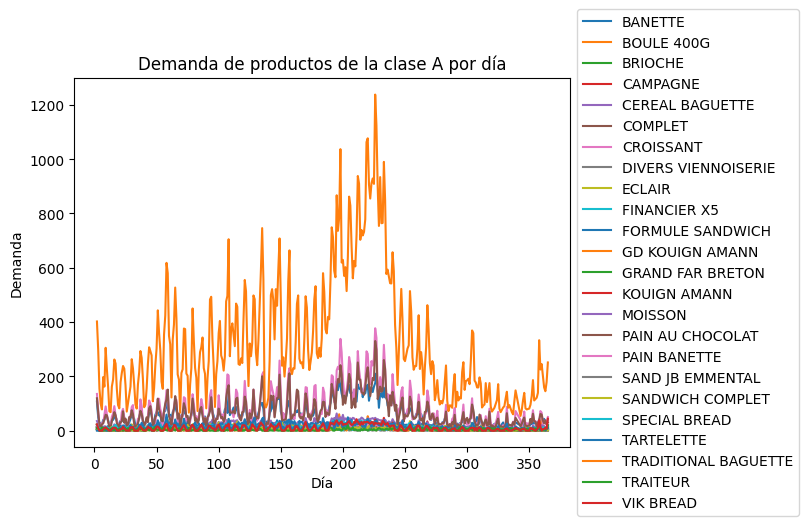

<Figure size 640x480 with 0 Axes>

In [34]:
# Graficar las series de tiempo de los productos de la clase A

import matplotlib.pyplot as plt

# graficar las series de tiempo
for i in range(1, len(df_clase_A_dia_pivot)):
    plt.plot(df_clase_A_dia_pivot.columns[1:], df_clase_A_dia_pivot.iloc[i, 1:], label=df_clase_A_dia_pivot.iloc[i, 0])

plt.xlabel("Día")
plt.ylabel("Demanda")
plt.title("Demanda de productos de la clase A por día")
plt.legend()

# el grafico se ve mal, porque los label de los productos ocupan mucho espacio
# ocultar los label de los productos (lineas)
plt.legend().set_visible(False)
# y poner una leyenda aparte
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

# guardar el grafico como imagen
plt.savefig("../data/Bakery sales class A by day.png")

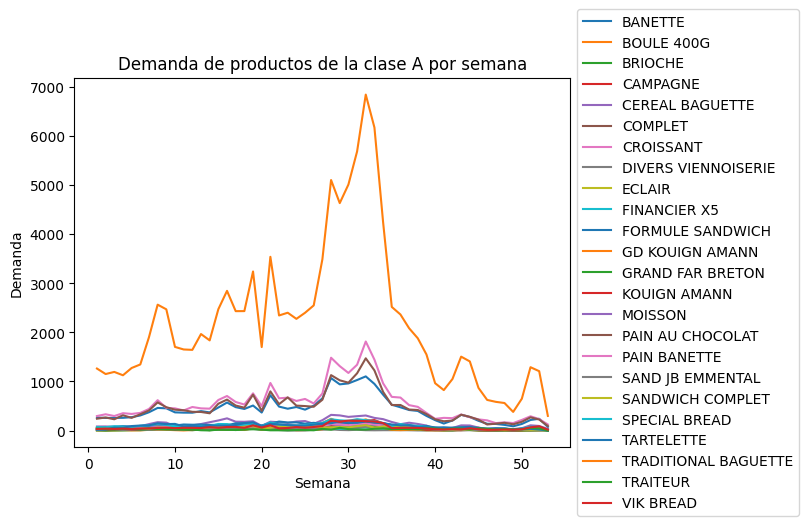

In [35]:
# lo mismo por semana
df_agrupado_semana = df.groupby(["article", "week"])["Quantity"].sum().reset_index()

df_clase_A_semana = pd.merge(df_clase_A, df_agrupado_semana, on="article")

df_clase_A_semana = df_clase_A_semana.drop(columns=["DemandaValorizada", "DemandaValorizadaPorcentual", "DemandaValorizadaPorcentualAcumulada", "Tipo"])

df_clase_A_semana_pivot = df_clase_A_semana.pivot(index="article", columns="week", values="Quantity").reset_index()

df_clase_A_semana_pivot = df_clase_A_semana_pivot.fillna(0)

df_clase_A_semana_pivot.to_csv("../data/Bakery sales class A by week.csv", index=False)

# graficar las series de tiempo
for i in range(1, len(df_clase_A_semana_pivot)):
    plt.plot(df_clase_A_semana_pivot.columns[1:], df_clase_A_semana_pivot.iloc[i, 1:], label=df_clase_A_semana_pivot.iloc[i, 0])

plt.xlabel("Semana")
plt.ylabel("Demanda")
plt.title("Demanda de productos de la clase A por semana")
plt.legend().set_visible(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


/tmp/ipykernel_62538/2359261231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clase_A["CV"] = df_clase_A["DemandaValorizadaPorcentual"] / df_clase_A["DemandaValorizada"]


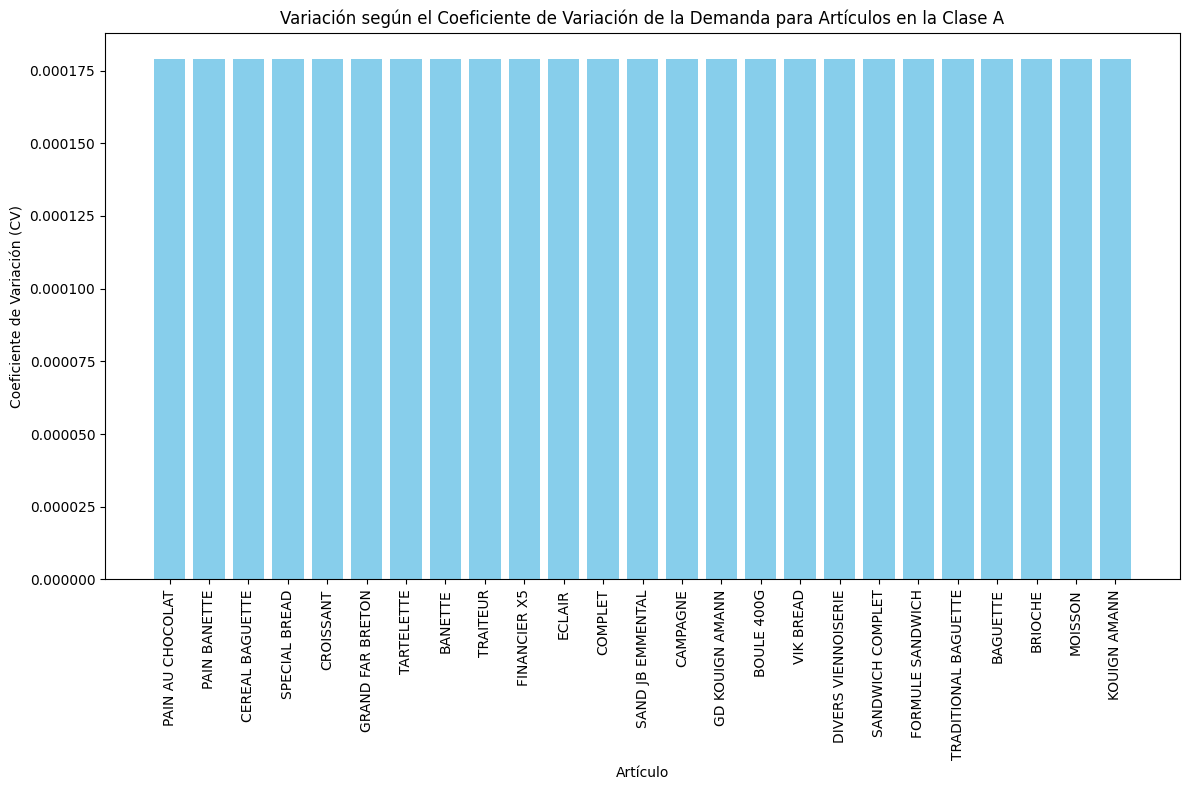

In [38]:
import matplotlib.pyplot as plt

# Calcular el coeficiente de variación (CV) para cada artículo en la clase A
df_clase_A["CV"] = df_clase_A["DemandaValorizadaPorcentual"] / df_clase_A["DemandaValorizada"]

# Ordenar los artículos por CV
df_clase_A_sorted = df_clase_A.sort_values(by="CV", ascending=False)

# Graficar el coeficiente de variación
plt.figure(figsize=(12, 8))
plt.bar(df_clase_A_sorted["article"], df_clase_A_sorted["CV"], color='skyblue')
plt.xlabel("Artículo")
plt.ylabel("Coeficiente de Variación (CV)")
plt.title("Variación según el Coeficiente de Variación de la Demanda para Artículos en la Clase A")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()